<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Polynomial Regression

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Polynomial Regression**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Linear Regression](https://youtu.be/0fzbyhWiP84?si=uRdmHOTzdnUvDPA9)
* [Polynomial Regression](https://youtu.be/z19Hs2HfO88?si=etUIb3LegiTigEio)
* [Numerical Optimization](https://youtu.be/4nYz5j0sAQs?si=n_553YQdh5grTquV)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Polynomial Regression

By moving from linear regression to polynomial regression we,

* add prediction flexibility by modeling non-linearity in our data

* build on the feature engineering concept of feature expansion

while benefiting from the analytical solutions for training model parameters like linear regression. 

We accomplish all of this with basis expansion, 

* we transform and expand the features $\rightarrow$ introduce basis expansion!

* we can increase our predictive model complexity and flexibility $\rightarrow$ nonlinear basis!

* we can improve the model robustness by removing multicollinearity $\rightarrow$ orthogonal basis!

Let's start with linear regression and then build to polynomial regression.

#### Linear Regression

Linear regression for prediction, let's start by looking at a linear model fit to a set of data.

<figure style="text-align: center;">
  <img src="_static/linear/linear_example.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Example linear regression model.</figcaption>
</figure>

Let's start by defining some terms,

* **predictor feature** - an input feature for the prediction model, given we are only discussing linear regression and not multilinear regression we have only one predictor feature, $x$. On out plots (including above) the predictor feature is on the x-axis.

* **response feature** - the output feature for the prediction model, in this case, $y$. On our plots (including above) the response feature is on the y-axis.

Now, here are some key aspects of linear regression:

**Parametric Model**

This is a parametric predictive machine learning model, we accept an a prior assumption of linearity and then gain a very low parametric representation that is easy to train without a onerous amount of data.

* the fit model is a simple weighted linear additive model based on all the available features, $x_1,\ldots,x_m$.
* the parametric model takes the form of: 

$$
y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0
$$

Here's the visualization of the linear model parameters,

<figure style="text-align: center;">
  <img src="_static/linear/linear_model.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">The linear model parameters.</figcaption>
</figure>

**Least Squares**

The analytical solution for the model parameters, $b_1,\ldots,b_m,b_0$, is available for the L2 norm loss function, the errors are summed and squared known a least squares.
* we minimize the error, residual sum of squares (RSS) over the training data: 

$$
RSS = \sum_{i=1}^n \left(y_i - (\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha,i} + b_0) \right)^2
$$

where $y_i$ is the actual response feature values and $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$ are the model predictions, over the $\alpha = 1,\ldots,n$ training data.

Here's a visualization of the L2 norm loss function, MSE,

<figure style="text-align: center;">
  <img src="_static/linear/linear_MSE.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">The linear model loss function, mean square error.</figcaption>
</figure>

* this may be simplified as the sum of square error over the training data, 

\begin{equation}
\sum_{i=1}^n (\Delta y_i)^2
\end{equation}

where $\Delta y_i$ is actual response feature observation $y_i$ minus the model prediction $\sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$, over the $i = 1,\ldots,n$ training data.

**Assumptions**

There are important assumption with our linear regression model,

* **Error-free** - predictor variables are error free, not random variables
   
* **Linearity** - response is linear combination of feature(s)
  
* **Constant Variance** - error in response is constant over predictor(s) value
  
* **Independence of Error** - error in response are uncorrelated with each other
  
* **No multicollinearity** - none of the features are redundant with other features

#### Predictor Feature / Basis Expansion

We can improve model flexibility and complexity by applying basis expansion with basis functions applied to our predictor features. The fundamental idea is to utilize a suite of basis functions, $h_1, h_2, \ldots, h_k$, that provide new predictor features.

$$
h(x_i) = (h_1(x_i),h_1(x_i),\ldots,h_k(x_i))
$$

where we from one feature $X$ to an expanded basis of $k$ features, $X_1, X_2,\ldots, X_k$. 

* if we had $m$ features in our data table, we now have $k \times m$ features

<figure style="text-align: center;">
  <img src="_static/polynomial/basis_expansion.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;">Basis expansion of predictor $m$ features with $k$ basis functions to $m \times k$ expanded features.</figcaption>
</figure>

#### Polynomial Regression

It can be shown that polynomial regression is just linear regression applied to a polynomial expansion of the predictor features.

$$
X_{j} \rightarrow X_{j}, X_{j}^2, X_{j}^3, \ldots X_{j}^k 
$$

where we have $j = 1, \ldots, m$ original features.

We now have a expanded set of predictor features.

$$
h_{j,k}(X_j) = X_j^k 
$$

were we have $j = 1, \ldots, m$ original features and $k = 1, \ldots, K$ polynomial orders.  

We can now state our model as a linear regression of the transformed features.

$$
y = f(x) = \sum_{j=1}^{m} \sum_{k = 1}^{K} \beta_{j,k} h_{j,m}(X_j) + \beta_0
$$

after the $h_l, l=1,\ldots,k$ transforms, over the $j=1,\ldots,m$ predictor features we have the same linear equation and the ability to utilize the previously discussed analytical solution, see the chapter on linear regression.

We are assuming linearity after application of our basis transforms.

* now the model coefficients, $\beta_{l,i}$, relate to a transformed version of the initial predictor feature, $h_l(X_i)$.

* but we lose the ability to interpret the coefficients, e.g., what is $\phi^4$ where $\phi$ is porosity?

For example, with a single predictor feature, $m = 1$, and up to a $4^{th}$ order the model is,

$$
y = \beta_{1,1}X_1 + \beta_{1,1}X_1^2 + \beta_{1,3}X_1^3 + \beta_{1,4}X_1^4 + \beta_0
$$

where the model parameter notation is $\beta_{m,k}$, were $m$ is the feature and $k$ is the order. To clarify here is the case for $m = 2$,

$$
y = \beta_{1,1}X_1 + \beta_{1,2}X_1^2 + \beta_{1,3}X_1^3 + \beta_{1,4}X_1^4 + \beta_{2,1}X_2 + \beta_{2,2}X_2^2 + \beta_{2,3}X_2^3 + \beta_{2,4}X_2^4 + \beta_0
$$

So our predictive modeling workflow is:

* apply polynomial basis expansion
* perform linear regression on the polynomial basis expansion

#### Advantage and Disadvantages of Polynomial Regression

The advantages of polynomial regression vs. linear regression, include,

* improved flexibility to fit nonlinear phenomenon, with linear analysis and an analytical solution to train the model parameters. 

Disadvantages 

Generally, significantly higher model variance! May have unstable interpolation and especially extrapolation. 

sensitivity to outliers, especially with $ℎ_𝑘 \left(𝑥_{𝑖,𝑗}\right)=𝑥_{𝑖,𝑗}^𝑘$ where $𝑘$ is large

we lose model parameter interpretability, $𝛽_{𝑗,𝑘}$ is related to $ℎ_𝑘 \left(𝑋_j \right)$.

#### Adding Elementary Functions

An alternative interpretation of polynomial regression is the construction of a regression model by adding elementary functions, i.e., the basis functions.

Let’s work with a single predictor feature and $K$ basis expansion.

$$ y = \sum_{l=1}^{k} \beta_{1,k} h_k (X_j) $$

For our simple, single predictor feature, $X$, polynomial problem this is,

$$ y = \beta_{1,K} X^K + \beta_{1,K-1} X^{K-1} + \dots + \beta_{1,2} X^2 + \beta_{1,1} X + \beta_0 $$

Let’s work with a 4th order polynomial expansion, $K=4$, of standardized depth.

<figure style="text-align: center;">
  <img src="_static/polynomial/basis.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Polynomial basis for up to \(K=4\).</figcaption>
</figure>

To build our function we are moving, scaling and adding these elementary functions. Let's review how we perform moving and scaling of an elementary function with the example of the $k=2$ basis function, i.e., a parabola, $h_2: 𝑦=𝑥^2$. Consider the following changes:

* shifting on the X-axis

* shifting on the Y-axis

* flipping on the X-axis

* changing the slope

For each, I show a visualization of the change and then the impact on the polynomial equation.

* Shifting the function on the X-axis,

<figure style="text-align: center;">
  <img src="_static/polynomial/shiftx.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Shifting $2^{nd}$ order elementary function on the X-axis.</figcaption>
</figure>

$$ y = (x - \Delta_x)^2 = x^2 - 2\Delta_x x + \Delta_x^2 $$

* Shifting the function on the Y-axis,

<figure style="text-align: center;">
  <img src="_static/polynomial/shiftx.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Shifting $2^{nd}$ order elementary function on the Y-axis.</figcaption>
</figure>
 
$$ y = x^2 - \Delta_y $$

* flipping the function on the X-axis:

<figure style="text-align: center;">
  <img src="_static/polynomial/flip.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Flipping the $2^{nd}$ order elmentary function on the X-axis.</figcaption>
</figure>

$$ y = \pm \beta_2 x^2 $$

* changing the slope:

<figure style="text-align: center;">
  <img src="_static/polynomial/scale.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Changing the slope of the $2^{nd}$ order elmentary function.</figcaption>
</figure>

$$ y = \downarrow \beta_2 x^2, \text{wider / shallower} $$

$$ y = \uparrow \beta_2 x^2, \text{narrower / deeper} $$

Let's make some observations from above,

* shifting on the Y-axis only requires modification of the contant term of the model parameters in the polynomial equation

* shifting on the X-axis requires modification of the lower order model parameters in the polynomial equation

* flipping on the X-axis requires change in sign of the current order model parameter in the polynomial equation

* increasing the slope requires increasing the current order model parameter in the polynomial equation

#### Assumptions of Polynomial Regression

There are important assumption with our polynomial regression model, extended from the assumptions of linear regression above,

* **Error-free** - predictor features basis expansions are error free, not random variables 

* **Constant Variance** - error in response is constant over predictor(s) value

* **Linearity** - response is linear combination of basis features 

* **Polynomial** - relationships between 𝑋 and Y is polynomial

* **Independence of Error** - error in response are uncorrelated with each other

* **No Multicollinearity** - none of the basis feature expansions are linearly redundant with other features

Consider the polynomial basis expansion above, are the colinearities between our basis. To check, I calculated the correlation matrix for the basis expansion used in the demonstration below.

<figure style="text-align: center;">
  <img src="_static/polynomial/corr_matrix.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Correlation matrix from a polynomial basis expansion with $K=4$.</figcaption>
</figure>

There is strong collinearity between the $K=1$ and $K=3$ bases and the $k=2$ and $k=4$ bases.

* recall, collinearity and multicolinearity may increase model variance

To remove this collinearity we can apply Hermite polynomials.

#### **Hermite Polynomials**

Is a family of orthogonal polynomials on the real number line.

| Order        | Hermite Polynomial $H_e(x)$             |
|:-------------:|:--------------------------------------:|
| 0th Order    | $H_{e_0}(x) = 1$                        |
| 1st Order    | $H_{e_1}(x) = x$                        |
| 2nd Order    | $H_{e_2}(x) = x^2 - 1$                  |
| 3rd Order    | $H_{e_3}(x) = x^3 - 3x$                 |
| 4th Order    | $H_{e_4}(x) = x^4 - 6x^2 + 3$           |

These polynomials are orthogonal with respect to a weighting function,

$$
𝑤(𝑥)=𝑒^{−\frac{𝑥^2}{2}}
$$

this is the standard Gaussian probability density function without the scaler, $\frac{1}{\sqrt{2\pi}}$. The definition of orthogonality is stated as,

$$ 
\int_{-\infty}^{\infty} H_m(x) H_n(x) w(x) \, dx = 0 
$$

The Hermite polynomials are orthogonal over the interval $[−\infty,\infty]$ for the standard normal probability distribution.

By applying hermite polynomials instead of regular polynomials for polynomial basis expandion in polynomial regression were remove the multicolinearity between the predictor features,

* recall, independence of the predictor features is an assumption of the linear system applied in polynomial regression with the polynomial basis expansion

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline                                         
suppress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy                                                  # Hermite polynomials
from scipy import stats                                       # statistical methods
import pandas as pd                                           # DataFrames
import pandas.plotting as pd_plot
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn.linear_model import LinearRegression             # linear regression with scikit learn
from sklearn.preprocessing import PolynomialFeatures          # polynomial basis expansion
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures) # standardize the features, polynomial basis expansion
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV,KFold) # model tuning
from sklearn.pipeline import (Pipeline,make_pipeline)         # machine learning modeling pipeline
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a convenience function to add gridlines to our plots and to plot correlation matrices.

In [2]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [3]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided bivariate, spatial dataset [Density_Por_data.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/Density_Por_data.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* depth (m)
* Gaussian transformed porosity (%)

We load it with the pandas 'read_csv' function into a data frame we called 'df'.

In [4]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1D_Porosity.csv") # data from Dr. Pyrcz's github repository

#### Visualize the DataFrame

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [5]:
df.head(n=13)                                                 # preview the data

,Depth,Nporosity
0,0.25,-1.37
1,0.50,-2.08
2,0.75,-1.67
3,1.00,-1.16
4,1.25,-0.24
5,1.50,-0.36
6,1.75,0.44
7,2.00,0.36
8,2.25,-0.02
9,2.50,-0.63


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The describe command provides count, mean, standard deviation, percentiles, minimum, maximum in a nice data table.
* I like to specify the percentiles, otherwise P25, P50 and P75 quartiles are the default

In [6]:
df.describe(percentiles=[0.1,0.9]).transpose()                # summary statistics

,count,mean,std,min,10%,50%,90%,max
Depth,40.0,5.12500,2.922613,0.25,1.225,5.125,9.025,10.00
Nporosity,40.0,0.02225,0.992111,-2.08,-1.271,0.140,1.220,2.35


Here we extract the Depth and Gaussian transformed porosity, Nporosity, from the DataFrame into separate 1D arrays called 'depth' and 'NPor' for readable code.

* warning, this is a shallow copy, if we change these 1D arrays, the change will be reflected back in the original DataFrame

In [7]:
Xname = ['Depth']; yname = ['Nporosity']                      # select the predictor and response feature

Xlabel = ['Depth']; ylabel = ['Gaussian Transformed Porosity'] # specify the feature labels for plotting
Xunit = ['m']; yunit = ['N[%]']
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')']
ylabelunit = ylabel[0] + ' (' + yunit[0] + ')'

X = df[Xname[0]]                                              # extract the 1D ndarrays from the DataFrame
y = df[yname[0]]

Xmin = 0.0; Xmax = 10.0                                       # limits for plotting
ymin = -3.0; ymax = 3.0

X_values = np.linspace(Xmin,Xmax,100)                         # X intervals to visualize the model 

#### Linear Regression Model

Let's first calculate the linear regression model with the LinearRegression class from scikit-learn. The steps include,

1. **instantiate** - the linear regression object, note there are no hyperparameters to specify.
2. **fit** - train the instantiated linear regression object with the training data
3. **predict** - with the trained linear regression object

Here's the instantiation and fit steps for our linear regression model.

* note, we add the reshape to our predictor feature because scikit-learn assumes more than one predictor feature and expects a 2D array. We reshape our 1D ndarray to a 2D array with only 1 column.

After we train the model we plot it with the data for visual model checking.

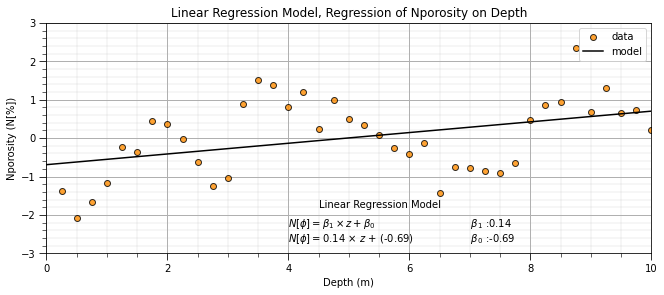

In [9]:
lin = LinearRegression()                                      # instantiate linear regression object, note no hyperparameters 
lin.fit(X.values.reshape(-1, 1), y)                           # train linear regression model

slope = lin.coef_[0]                                          # get the model parameters
intercept = lin.intercept_

plt.subplot(111)                                              # plot the data and the model
plt.scatter(X,y,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.plot(X_values,intercept + slope*X_values,label='model',color = 'black')
plt.title('Linear Regression Model, Regression of ' + yname[0] + ' on ' + Xname[0])
plt.xlabel(Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel(yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([Xmin,Xmax]); plt.ylim([ymin,ymax])
plt.annotate('Linear Regression Model',[4.5,-1.8])
plt.annotate(r'    $\beta_1$ :' + str(round(slope,2)),[6.8,-2.3])
plt.annotate(r'    $\beta_0$ :' + str(round(intercept,2)),[6.8,-2.7])
plt.annotate(r'$N[\phi] = \beta_1 \times z + \beta_0$',[4.0,-2.3])
plt.annotate(r'$N[\phi] = $' + str(round(slope,2)) + r' $\times$ $z$ + (' + str(round(intercept,2)) + ')',[4.0,-2.7])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Comparison to a Nonparametric Predictive Machine Learning Model

Let's run a couple nonparametric predictive machine learning models to contrast with the linear and polynomial parametric models. First we train a quick decision tree model and then a random forest model.

* we gain significant flexibility to fit any patterns from the data
* requires more inference as nonparametric is actually parameter rich!

For more details, see the chapter on decision trees and random forest.

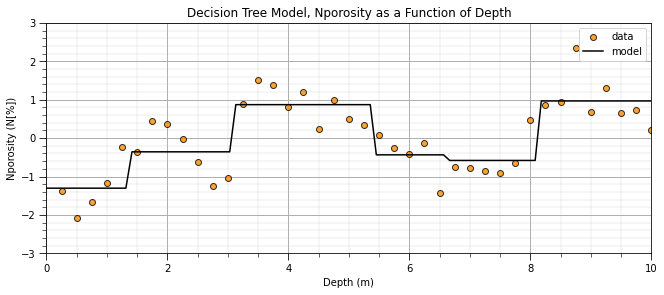

In [10]:
from sklearn import tree                                      # tree program from scikit learn 

my_tree = tree.DecisionTreeRegressor(min_samples_leaf=5, max_depth = 20) # instantiate the decision tree model with hyperparameters
my_tree = my_tree.fit(X.values.reshape(-1, 1),y)              # fit the decision tree to the training data (all the data in this case)
DT_y = my_tree.predict(X_values.reshape(-1,1))                # predict at high resolution over the range of depths

plt.subplot(111)                                              # plot the model and data
plt.scatter(X,y,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.plot(X_values, DT_y, label='model', color = 'black')
plt.title('Decision Tree Model, ' + yname[0] + ' as a Function of ' + Xname[0])
plt.xlabel(Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel(yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([Xmin,Xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

and here is a random forest model:

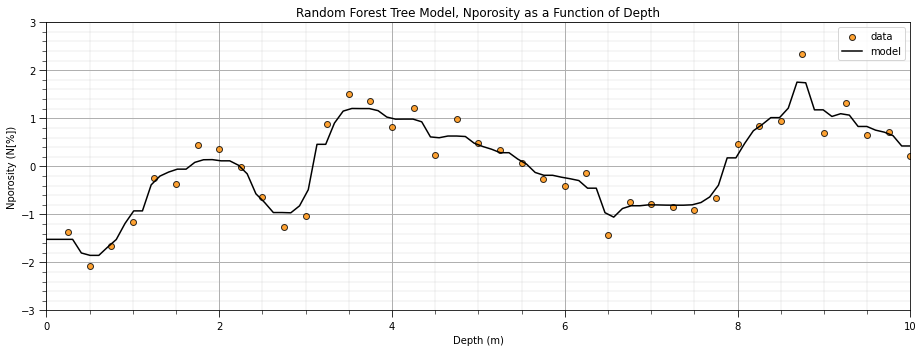

In [11]:
from sklearn.ensemble import RandomForestRegressor            # random forest method

max_depth = 5                                                 # set the random forest hyperparameters
num_tree = 1000
max_features = 1

my_forest = RandomForestRegressor(max_depth=max_depth,random_state=seed,n_estimators=num_tree,max_features=max_features)
my_forest.fit(X = X.values.reshape(-1, 1), y = y)  
RF_y = my_forest.predict(X_values.reshape(-1,1))
plt.subplot(111)
plt.scatter(X,y,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.plot(X_values, RF_y, label='model', color = 'black')
plt.title('Random Forest Tree Model, ' + yname[0] + ' as a Function of ' + Xname[0])
plt.xlabel(Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel(yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([Xmin,Xmax]); plt.ylim([ymin,ymax])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Note, no effort was made to tune the hyperparameters for these models. I just wanted to demonstrate the great flexibility of a nonparametric model to learn the shape of the system from the data.

Now, we return to our parametric polynomial model. 

* Let's first transform our data to be standard normal, Gaussian.

* We do this to improve the model fit (handle outliers) and to comply with theory for the Hermite polynomials that will be introduced shortly.

#### Gaussian Anamorphosis \ Gaussian Transform

Let's transform the features to standard normal,

* Gaussian distribution
* mean of 0.0
* standard deviation of 1.0

The porosity feature was 'transformed' to Gaussian previously, but there is an opportunity to clean it up.

* compare the original and transformed below
* note, I use my GeostatsPy Gaussian transform ported from the original GSLIB (Deutsch and Journel, 1997) because the scikit-learn Gaussian transform creates truncation spikes / outliers.

In [12]:
import geostatspy.geostats as geostats                        # for Gaussian transform from GSLIB

df_ns = pd.DataFrame()   
df_ns[Xname[0]], tvPor, tnsPor = geostats.nscore(df, Xname[0]) # nscore transform for all facies porosity 
df_ns[yname[0]], tvdepth, tnsdepth = geostats.nscore(df, yname[0]) # nscore transform for all facies permeability
X_ns = df_ns[Xname[0]]; y_ns = df_ns[yname[0]]
X_ns_values = np.linspace(-3.0,3.0,1000)                      # values to predict at in standard normal space               

Let's make some good cumulative distribution function plots to check the original and transformed variables.

* the results look very good

We are doing this because we will need a Gaussian distribution for the predictor feature for orthogonality.  More later!

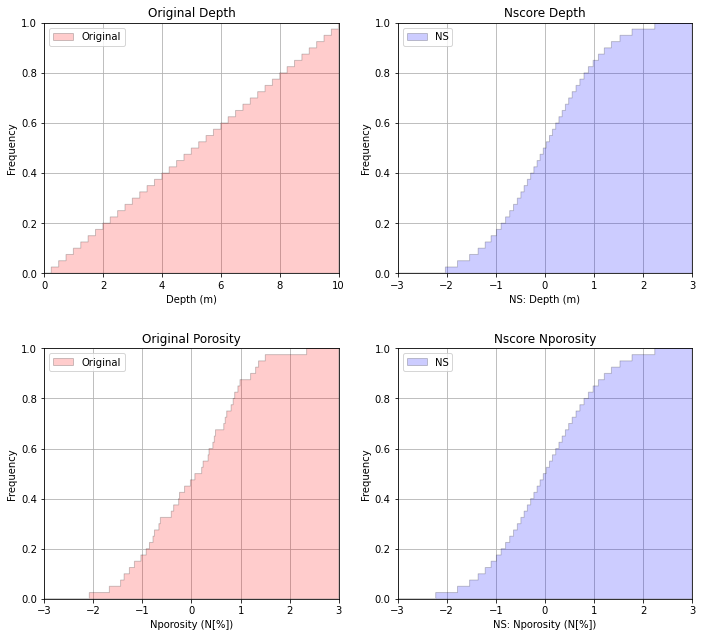

In [13]:
plt.subplot(221)                                              # plot original sand and shale porosity histograms
plt.hist(df[Xname[0]], facecolor='red',bins=np.linspace(Xmin,Xmax,1000),histtype="stepfilled",alpha=0.2,density=True,
         cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.0,10.0]); plt.ylim([0,1.0])
plt.xlabel(Xname[0] + ' (' + Xunit[0] + ')'); plt.ylabel('Frequency'); plt.title('Original Depth')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(222)  
plt.hist(df_ns[Xname[0]], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,
         cumulative=True,edgecolor='black',label = 'NS')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')'); plt.ylabel('Frequency'); plt.title('Nscore ' + Xname[0])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(df[yname[0]], facecolor='red',bins=np.linspace(ymin,ymax,1000),histtype="stepfilled",alpha=0.2,density=True,
         cumulative=True,edgecolor='black',label='Original')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel(yname[0] + ' (' + yunit[0] + ')'); plt.ylabel('Frequency'); plt.title('Original Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(df_ns[yname[0]], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,
         cumulative=True,edgecolor='black',label = 'NS')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('NS: ' + yname[0] + ' (' + yunit[0] + ')'); plt.ylabel('Frequency'); plt.title('Nscore ' + yname[0])
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=2.0, wspace=0.2, hspace=0.3); plt.show()

#### Linear Regression Model with Standardized Features

Let's repeat the linear regression model, now with the standardized features.

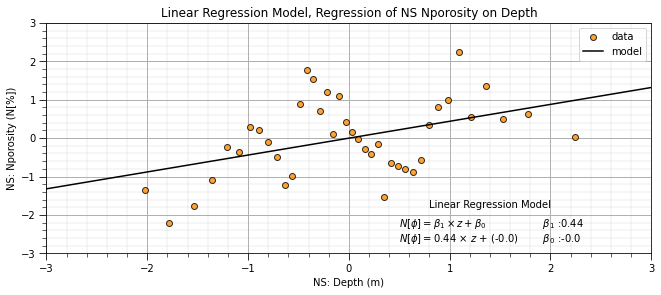

In [14]:
lin_ns = LinearRegression()                                   # instantiate linear regression object, note no hyperparameters 
lin_ns.fit(X_ns.values.reshape(-1, 1), y_ns)                  # train linear regression model
slope_ns = lin_ns.coef_[0]                                    # get the model parameters
intercept_ns = lin_ns.intercept_

plt.subplot(111)                                              # plot the data and the model
plt.scatter(X_ns,y_ns,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.plot(X_ns_values,intercept_ns + slope_ns*X_ns_values,label='model',color = 'black')
plt.title('Linear Regression Model, Regression of NS ' + yname[0] + ' on ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('NS: ' + yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([-3.0,3.0]); plt.ylim([ymin,ymax])
plt.annotate('Linear Regression Model',[0.8,-1.8])
plt.annotate(r'    $\beta_1$ :' + str(round(slope_ns,2)),[1.8,-2.3])
plt.annotate(r'    $\beta_0$ :' + str(round(intercept_ns,2)),[1.8,-2.7])
plt.annotate(r'$N[\phi] = \beta_1 \times z + \beta_0$',[0.5,-2.3])
plt.annotate(r'$N[\phi] = $' + str(round(slope_ns,2)) + r' $\times$ $z$ + (' + str(round(intercept_ns,2)) + ')',[0.5,-2.7])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Once again, not a good fit. Let's use a more complex, flexible predictive machine learning model.

#### Polynomial Regression 

We will do polynomial regression by hand:

* create the polynomial basis expansion of the original predictor feature

* perform linear regression on the polynomial basis expansion

##### Polynomial Basis Expansion

Let's start with calculating the polynomial basis expansion for the 1 predictor feature.

In [15]:
poly4 = PolynomialFeatures(degree = 4)                        # instantiate polynomial expansion 
X_ns_poly4 = poly4.fit_transform(X_ns.values.reshape(-1, 1))  # calculate the basis expansion for our dataset
df_X_ns_poly4 = pd.DataFrame({'Values':X_ns,'0th':X_ns_poly4[:,0],'1st':X_ns_poly4[:,1],'2nd':X_ns_poly4[:,2], 
                              '3rd':X_ns_poly4[:,3],'4th':X_ns_poly4[:,4]}) # make a new DataFrame from the vectors
df_X_ns_poly4 = pd.DataFrame({'Values':X_ns,'1st':X_ns_poly4[:,1],'2nd':X_ns_poly4[:,2], 
                              '3rd':X_ns_poly4[:,3],'4th':X_ns_poly4[:,4]}) # make a new DataFrame from the vectors
df_X_ns_poly4.head()                                          # preview the polynomial basis expansion with the original predictor feature

,Values,1st,2nd,3rd,4th
0,-2.026808,-2.026808,4.107951,-8.326029,16.875264
1,-1.780464,-1.780464,3.170053,-5.644167,10.049238
2,-1.534121,-1.534121,2.353526,-3.610592,5.539084
3,-1.356312,-1.356312,1.839582,-2.495046,3.384060
4,-1.213340,-1.213340,1.472193,-1.786270,2.167352


Now let's check the correlation between the polynomial basis expansion of the original predictor features data.

* Recall that a high degree of correlation between predictor features increases model variance.

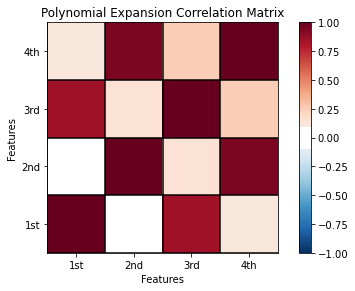

In [16]:
corr_matrix = df_X_ns_poly4.iloc[:,1:].corr()                 # calculate the correlation matrix

plt.subplot(111)
plot_corr(corr_matrix,'Polynomial Expansion Correlation Matrix',1.0,0.1) # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

We have high correlations between order 1 and 3 and order 2 and 4.

* Let's check this with matrix scatter plot of the polynomial basis.

#### Visualize the Polynomial Expansion Features' Pairwise Relationship

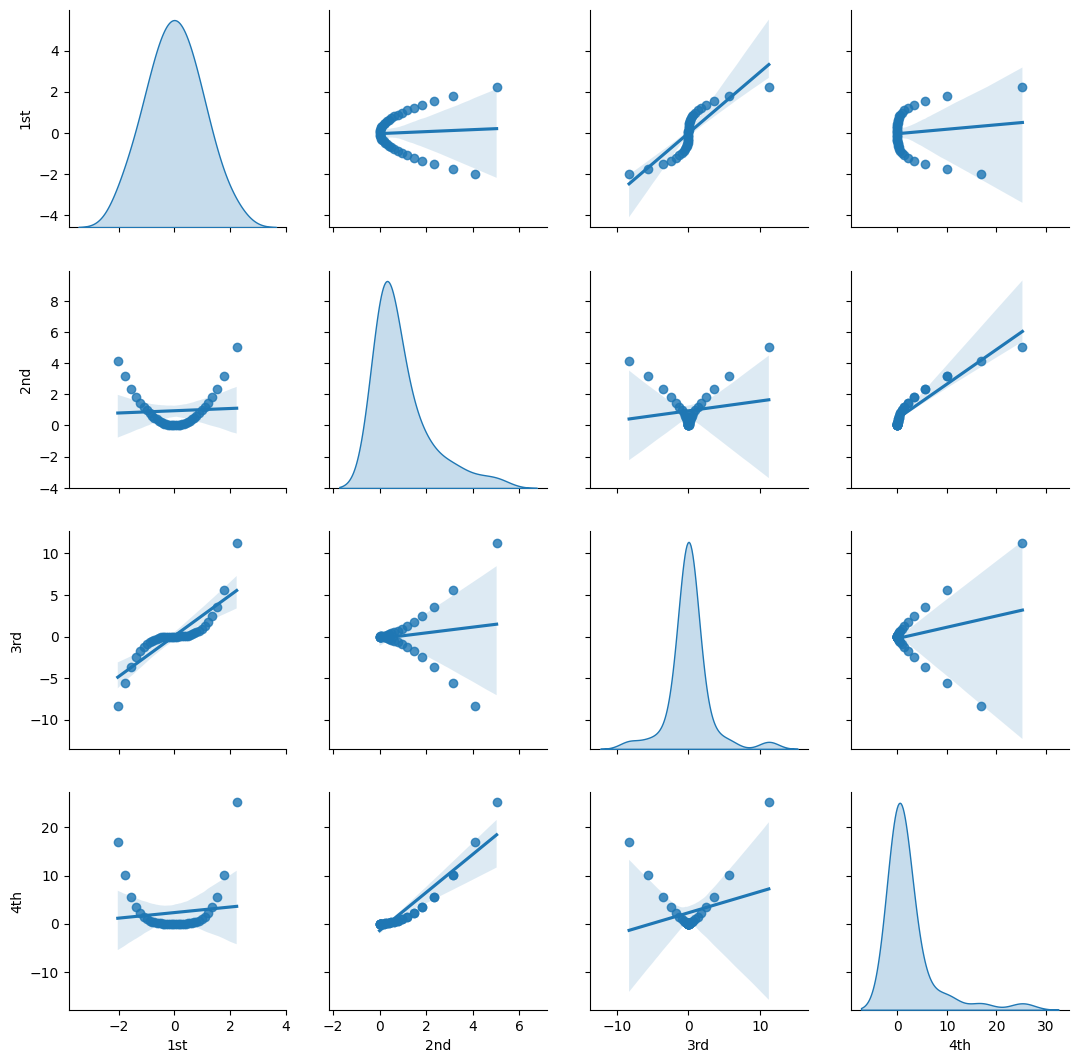

In [16]:
sns.pairplot(df_X_ns_poly4.iloc[:,1:],vars=['1st','2nd','3rd','4th'],markers='o', kind='reg',diag_kind='kde')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Let's visualize the polynomial expansion over the Gaussian transformed depth.

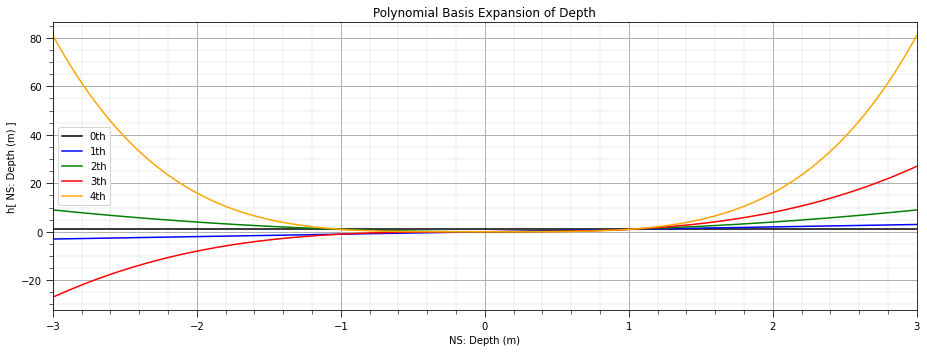

In [17]:
plt.subplot(111)                                              # plot the polynomial basis expansion
plt.plot(X_ns_values,poly4.fit_transform(X_ns_values.reshape(-1, 1))[:,0],label='0th',color = 'black')
plt.plot(X_ns_values,poly4.fit_transform(X_ns_values.reshape(-1, 1))[:,1],label='1th',color = 'blue')
plt.plot(X_ns_values,poly4.fit_transform(X_ns_values.reshape(-1, 1))[:,2],label='2th',color = 'green')
plt.plot(X_ns_values,poly4.fit_transform(X_ns_values.reshape(-1, 1))[:,3],label='3th',color = 'red')
plt.plot(X_ns_values,poly4.fit_transform(X_ns_values.reshape(-1, 1))[:,4],label='4th',color = 'orange') 
plt.title('Polynomial Basis Expansion of ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('h[ NS: ' + Xname[0] + ' (' + Xunit[0] + ') ]')
plt.legend(); plt.xlim(-3,3); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

We can also check the arithmetic average of each polynomial basis expansion.

In [18]:
print('The averages of each basis expansion, 0 - 4th order = ' + str(stats.describe(X_ns_poly4)[2]) + '.')

The averages of each basis expansion, 0 - 4th order = [1.         0.00536486 0.9458762  0.07336308 2.31077802].


Let's fit the linear regression model to the polynomial basis expansion.

* note the model is quite flexible to fit this complicated / nonlinear data

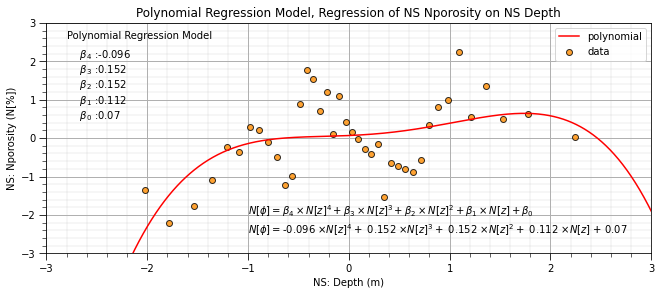

In [19]:
lin_poly4 = LinearRegression()                                # instantiate new linear model 
lin_poly4.fit(df_X_ns_poly4.iloc[:,1:], y_ns)                 # train linear model with polynomial expansion, polynomial regression
b1,b2,b3,b4 = np.round(lin_poly4.coef_,3)                     # retrieve the model parameters
b0 = lin_poly4.intercept_

plt.subplot(111)
plt.plot(X_ns_values,lin_poly4.predict(poly4.fit_transform(X_ns_values.reshape(-1, 1))[:,1:]),label='polynomial',color = 'red') 
plt.scatter(X_ns,y_ns,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.title('Polynomial Regression Model, Regression of NS ' + yname[0] + ' on NS ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('NS: ' + yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([-3.0,3.0]); plt.ylim([ymin,ymax])
plt.annotate('Polynomial Regression Model',[-2.8,2.6])
plt.annotate(r'    $\beta_4$ :' + str(round(b4,3)),[-2.8,2.1])
plt.annotate(r'    $\beta_3$ :' + str(round(b3,3)),[-2.8,1.7])
plt.annotate(r'    $\beta_2$ :' + str(round(b2,3)),[-2.8,1.3])
plt.annotate(r'    $\beta_1$ :' + str(round(b1,3)),[-2.8,0.9])
plt.annotate(r'    $\beta_0$ :' + str(round(b0,2)),[-2.8,0.5])
plt.annotate(r'$N[\phi] = \beta_4 \times N[z]^4 + \beta_3 \times N[z]^3 + \beta_2 \times N[z]^2 + \beta_1 \times N[z] + \beta_0$',[-1.0,-2.0])
plt.annotate(r'$N[\phi] = $' + str(b4) + r' $\times N[z]^4 +$ ' + str(b3) + r' $\times N[z]^3 +$ ' + str(b2) + r' $\times N[z]^2 +$ ' + 
             str(b1) + r' $\times N[z]$ + ' + str(round(b0,2)),[-1.0,-2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Regression with Hermite Basis Expansion

We can use Hermite polynomials to reduce the correlation between the basis predictor features.

* We transform the predictor feature, depth, to standard normal since the Hermite polynomial expansion approach independence over the range of negative infinity to positive infinity under the assumption of standard normal probability density function. 

In [20]:
orders4 = [1,2,3,4]                                           # specify the orders for Hermite basis expansion
X_ns_hermite4 = scipy.special.eval_hermitenorm(orders4,X_ns.values.reshape(-1, 1), out=None) # Hermite polynomials for X 
df_X_ns_hermite4 = pd.DataFrame({'value':X_ns.values,'1st':X_ns_hermite4[:,0],'2nd':X_ns_hermite4[:,1], 
                                     '3rd':X_ns_hermite4[:,2],'4th':X_ns_hermite4[:,3]}) # make a new DataFrame from the vectors
df_X_ns_hermite4.head()

,value,1st,2nd,3rd,4th
0,-2.026808,-2.026808,3.107951,-2.245605,-4.772444
1,-1.780464,-1.780464,2.170053,-0.302774,-5.971082
2,-1.534121,-1.534121,1.353526,0.991769,-5.582071
3,-1.356312,-1.356312,0.839582,1.573889,-4.653429
4,-1.213340,-1.213340,0.472193,1.853749,-3.665806


Note: I have omitted orders that had a higher degree of correlation for our dataset.

Let's check the correlation between the Hermite predictor features. There is improvement.

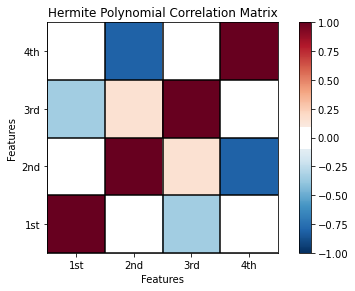

In [21]:
hermite_corr_matrix = df_X_ns_hermite4.iloc[:,1:].corr()      # calculate correlation matrix of Hermite basis expansion of X

plt.subplot(111)
plot_corr(hermite_corr_matrix,'Hermite Polynomial Correlation Matrix',1.0,0.1) # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

The pairwise linear correlation is quite low compared to the polynomial basis.

Let's visualize the bivariate relationships between our Hermite basis orders. 

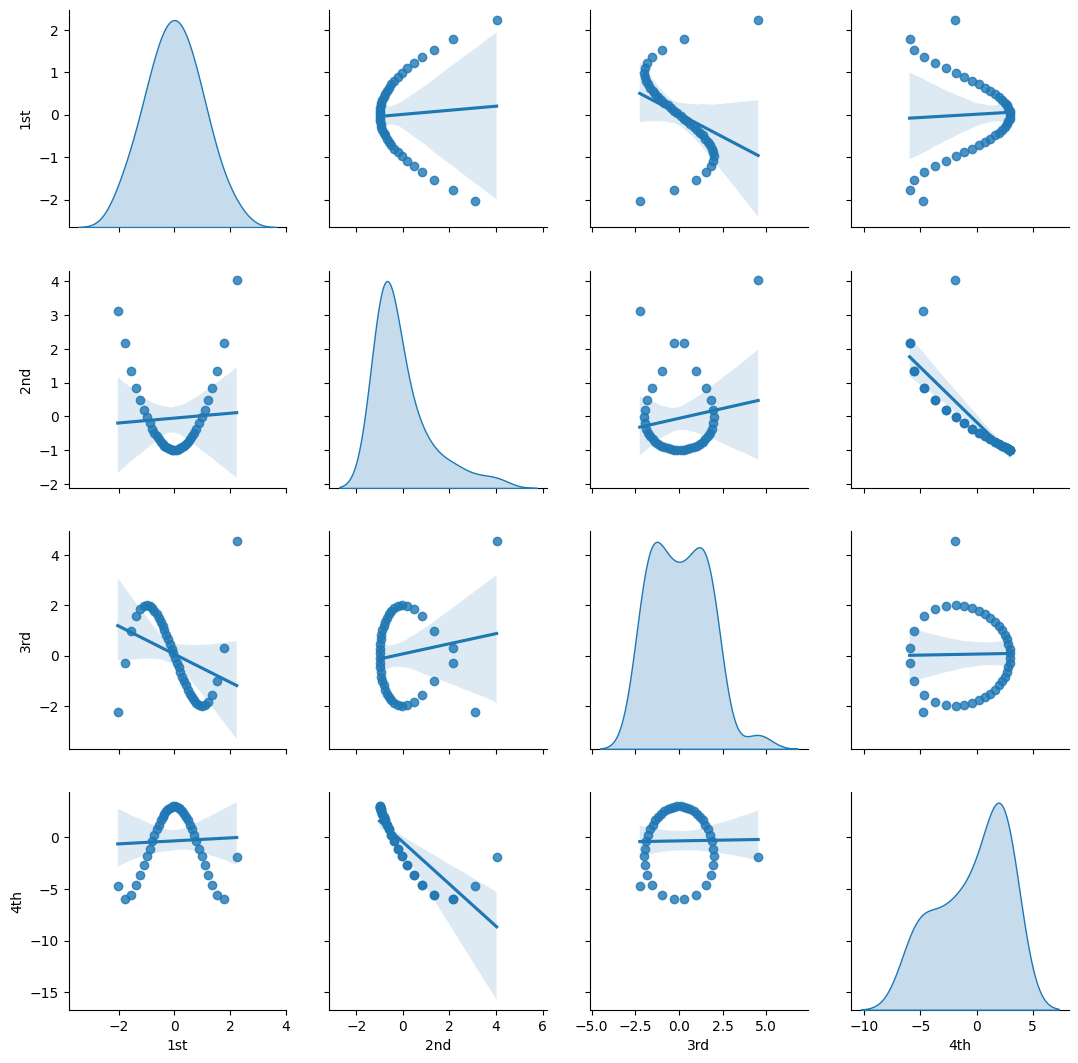

In [22]:
sns.pairplot(df_X_ns_hermite4.iloc[:,1:],vars=['1st','2nd','3rd','4th'],markers='o', kind='reg',diag_kind='kde')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

We can check the arithmetic averages of all the Hermite basis expansions.

In [22]:
print('The means of each basis expansion, 1 - 4th order = ' + str(stats.describe(X_ns_hermite4)[2]) + '.')

The means of each basis expansion, 1 - 4th order = [ 0.00536486 -0.0541238   0.05726848 -0.36447919].


Let's visualize Hermite polynomials over the range of the standardized depth.

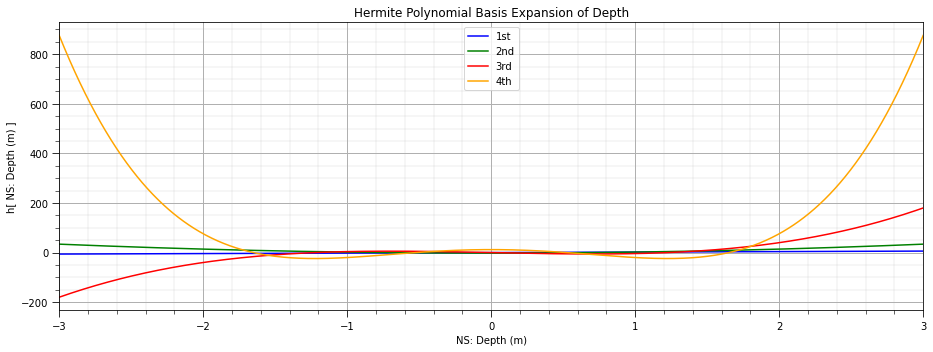

In [23]:
plt.subplot(111)                                              # plot Hermite polynomials
plt.plot(X_ns_values,scipy.special.eval_hermite(orders4,X_ns_values.reshape(-1, 1))[:,0],label='1st',color = 'blue')
plt.plot(X_ns_values,scipy.special.eval_hermite(orders4,X_ns_values.reshape(-1, 1))[:,1],label='2nd',color = 'green')
plt.plot(X_ns_values,scipy.special.eval_hermite(orders4,X_ns_values.reshape(-1, 1))[:,2],label='3rd',color = 'red')
plt.plot(X_ns_values,scipy.special.eval_hermite(orders4,X_ns_values.reshape(-1, 1))[:,3],label='4th',color = 'orange')
plt.title('Hermite Polynomial Basis Expansion of ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('h[ NS: ' + Xname[0] + ' (' + Xunit[0] + ') ]')
plt.legend(); plt.xlim(-3,3); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Now let's fit our Hermite basis regression model.

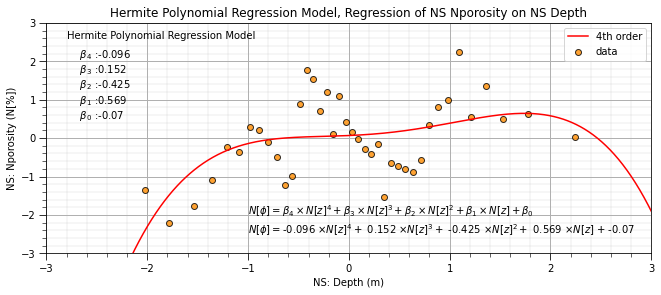

In [24]:
lin_herm4 = LinearRegression()                                # instantiate model
lin_herm4.fit(df_X_ns_hermite4.iloc[:,1:], y_ns)              # fit Hermite polynomials 
hb1,hb2,hb3,hb4 = np.round(lin_herm4.coef_,3)                 # retrieve the model parameters
hb0 = lin_herm4.intercept_
plt.subplot(111)                                              # plot data and model
plt.plot(X_ns_values, lin_herm4.predict(scipy.special.eval_hermitenorm(orders4,X_ns_values.reshape(-1, 1), out=None)), 
         label='4th order',color = 'red') 
plt.scatter(X_ns,y_ns,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.title('Hermite Polynomial Regression Model, Regression of NS ' + yname[0] + ' on NS ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('NS: ' + yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([-3.0,3.0]); plt.ylim([ymin,ymax])
plt.annotate('Hermite Polynomial Regression Model',[-2.8,2.6])
plt.annotate(r'    $\beta_4$ :' + str(round(hb4,3)),[-2.8,2.1])
plt.annotate(r'    $\beta_3$ :' + str(round(hb3,3)),[-2.8,1.7])
plt.annotate(r'    $\beta_2$ :' + str(round(hb2,3)),[-2.8,1.3])
plt.annotate(r'    $\beta_1$ :' + str(round(hb1,3)),[-2.8,0.9])
plt.annotate(r'    $\beta_0$ :' + str(round(hb0,2)),[-2.8,0.5])
plt.annotate(r'$N[\phi] = \beta_4 \times N[z]^4 + \beta_3 \times N[z]^3 + \beta_2 \times N[z]^2 + \beta_1 \times N[z] + \beta_0$',[-1.0,-2.0])
plt.annotate(r'$N[\phi] = $' + str(hb4) + r' $\times N[z]^4 +$ ' + str(hb3) + r' $\times N[z]^3 +$ ' + str(hb2) + r' $\times N[z]^2 +$ ' + 
             str(hb1) + r' $\times N[z]$ + ' + str(round(hb0,2)),[-1.0,-2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

Since we have less correlation between the expanded basis features we can check out the model coefficients and interpret the unique importance of each order.

#### Orthogonal Polynomials

Let's try the orthogonal polynomial basis expansion reimplemented in Python by Dave Moore from the poly() function in R.

* the functions below for fit and predict are directly from Dave's [blog](http://davmre.github.io/blog/python/2013/12/15/orthogonal_poly)
* note during the fit to the training data the norm2 and alpha model parameters are calcluated
* these parameters must be passed to each subsequent predict to ensure the results are consistent

In [25]:
# functions taken (without modification) from http://davmre.github.io/blog/python/2013/12/15/orthogonal_poly
# appreciation to Dave Moore for the great blog post on titled 'Orthogonal polynomial regression in Python'
# functions are Dave's reimplementation of poly() from R

def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha

def ortho_poly_predict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
        for i in np.arange(1,degree):
             Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z /= np.sqrt(norm2)
    return Z

Let's give it a try and perform orthogonal polynomial expansion of our standard normal transformed depth

In [27]:
X_ns_ortho4, norm2, alpha = ortho_poly_fit(X_ns.values.reshape(-1, 1), degree = 4) # orthogonal polynomial expansion
df_X_ns_ortho4 = pd.DataFrame({'value':X_ns.values,'1st':X_ns_ortho4[:,1],'2nd':X_ns_ortho4[:,2],'3rd':X_ns_ortho4[:,3],
                               '4th':X_ns_ortho4[:,4]})       # make a new DataFrame from the vectors
df_X_ns_ortho4.head()

,value,1st,2nd,3rd,4th
0,-2.026808,-0.330385,0.440404,-0.460160,0.420374
1,-1.780464,-0.290335,0.313201,-0.207862,0.021278
2,-1.534121,-0.250285,0.202153,-0.029761,-0.172968
3,-1.356312,-0.221377,0.132038,0.058235,-0.220834
4,-1.213340,-0.198133,0.081765,0.107183,-0.219084


Let's check the correlation between the orthogonal polynomial predictor features. I'm impressed! The between basis feature order correlations are all zero!

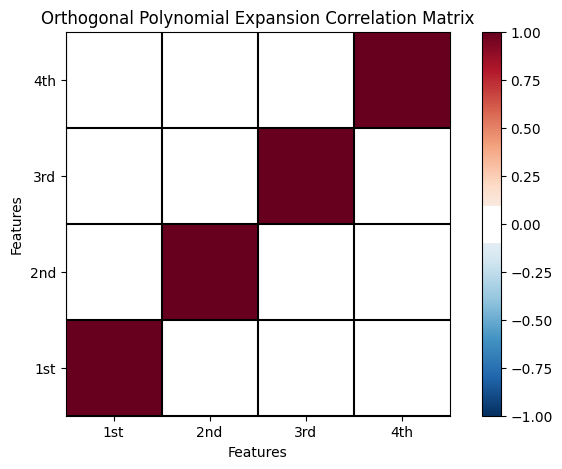

In [28]:
ortho_corr_matrix = df_X_ns_ortho4.iloc[:,1:].corr()          # calculate the correlation matrix

plt.subplot(111)
plot_corr(ortho_corr_matrix,'Orthogonal Polynomial Expansion Correlation Matrix',1.0,0.1) # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Let's visualize the bivariate relationships between our orthogonal polynomial basis orders. 

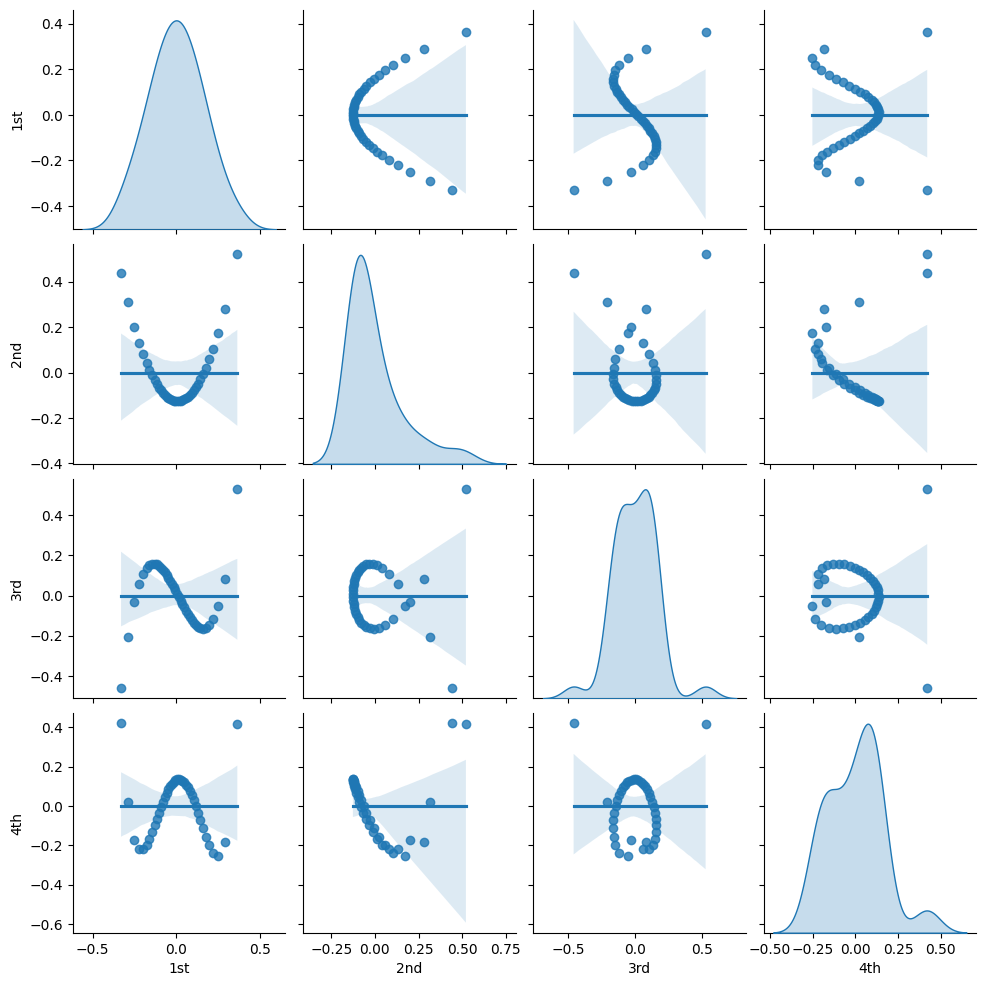

In [29]:
sns.pairplot(df_X_ns_ortho4.iloc[:,1:],vars=['1st','2nd','3rd','4th'],markers='o',kind='reg',diag_kind='kde')

Let's visualize orthogonal polynomial basis orders over the range of the standardized depth.

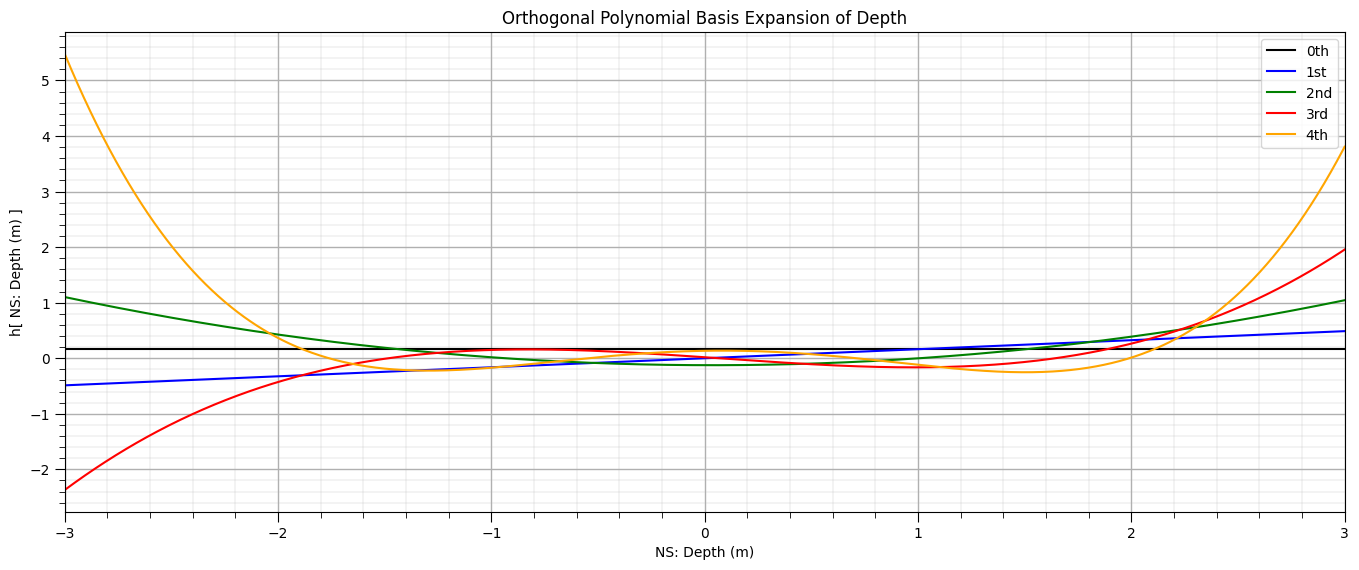

In [30]:
ortho_poly_ns_values = ortho_poly_predict(X_ns_values.reshape(-1, 1), alpha, norm2, degree = 4)

plt.subplot(111)
plt.plot(X_ns_values, ortho_poly_ns_values[:,0], label='0th', color = 'black')
plt.plot(X_ns_values, ortho_poly_ns_values[:,1], label='1st', color = 'blue')
plt.plot(X_ns_values, ortho_poly_ns_values[:,2], label='2nd', color = 'green')
plt.plot(X_ns_values, ortho_poly_ns_values[:,3], label='3rd', color = 'red')
plt.plot(X_ns_values, ortho_poly_ns_values[:,4], label='4th', color = 'orange')
plt.title('Orthogonal Polynomial Basis Expansion of ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('h[ NS: ' + Xname[0] + ' (' + Xunit[0] + ') ]')
plt.legend(); plt.xlim(-3,3); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

Finally let's fit our orthogonal polynomial basis expansion regression model.

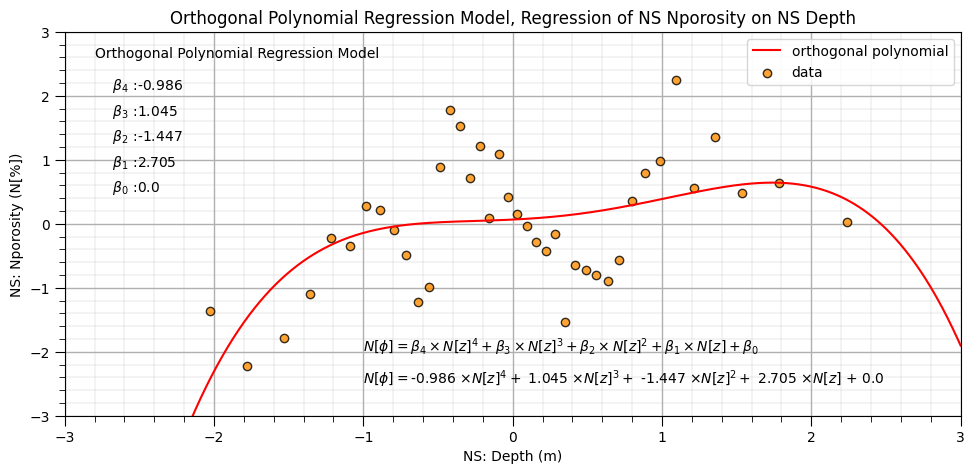

In [31]:
lin_ortho4 = LinearRegression()                               # instantiate model
lin_ortho4.fit(df_X_ns_ortho4.iloc[:,1:], y_ns)               # fit Hermite polynomials 
ob1,ob2,ob3,ob4 = np.round(lin_ortho4.coef_,3)                # retrieve the model parameters
ob0 = lin_ortho4.intercept_

plt.subplot(111)
plt.plot(X_ns_values,lin_ortho4.predict(ortho_poly_ns_values[:,1:]),label='orthogonal polynomial',color = 'red') 
plt.scatter(X_ns,y_ns,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.title('Orthogonal Polynomial Regression Model, Regression of NS ' + yname[0] + ' on NS ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('NS: ' + yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([-3.0,3.0]); plt.ylim([ymin,ymax])
plt.annotate('Orthogonal Polynomial Regression Model',[-2.8,2.6])
plt.annotate(r'    $\beta_4$ :' + str(round(ob4,3)),[-2.8,2.1])
plt.annotate(r'    $\beta_3$ :' + str(round(ob3,3)),[-2.8,1.7])
plt.annotate(r'    $\beta_2$ :' + str(round(ob2,3)),[-2.8,1.3])
plt.annotate(r'    $\beta_1$ :' + str(round(ob1,3)),[-2.8,0.9])
plt.annotate(r'    $\beta_0$ :' + str(round(ob0,2)),[-2.8,0.5])
plt.annotate(r'$N[\phi] = \beta_4 \times N[z]^4 + \beta_3 \times N[z]^3 + \beta_2 \times N[z]^2 + \beta_1 \times N[z] + \beta_0$',[-1.0,-2.0])
plt.annotate(r'$N[\phi] = $' + str(ob4) + r' $\times N[z]^4 +$ ' + str(ob3) + r' $\times N[z]^3 +$ ' + str(ob2) + r' $\times N[z]^2 +$ ' + 
             str(ob1) + r' $\times N[z]$ + ' + str(round(ob0,2)),[-1.0,-2.5])

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.4, top=0.8, wspace=0.2, hspace=0.2); plt.show()

#### Polynomial Regression in scikit-learn with Pipelines

The need to first perform basis expansion and then train the resulting (after basis transformations) linear model may seem a bit complicated.

* one solution is to use the Pipeline object from scikit-learn. Here are some highlights on Pipelines.

Machine learning workflows can be complicated, with various steps:

* data preparation, feature engineering transformations

* model parameter fitting

* model hyperparameter tuning

* modeling method selection

* searching over a large combinatorial of hyperparameters

* training and testing model runs

Pipelines are a scikit-learn class that allows for the encapsulation of a sequence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible

The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

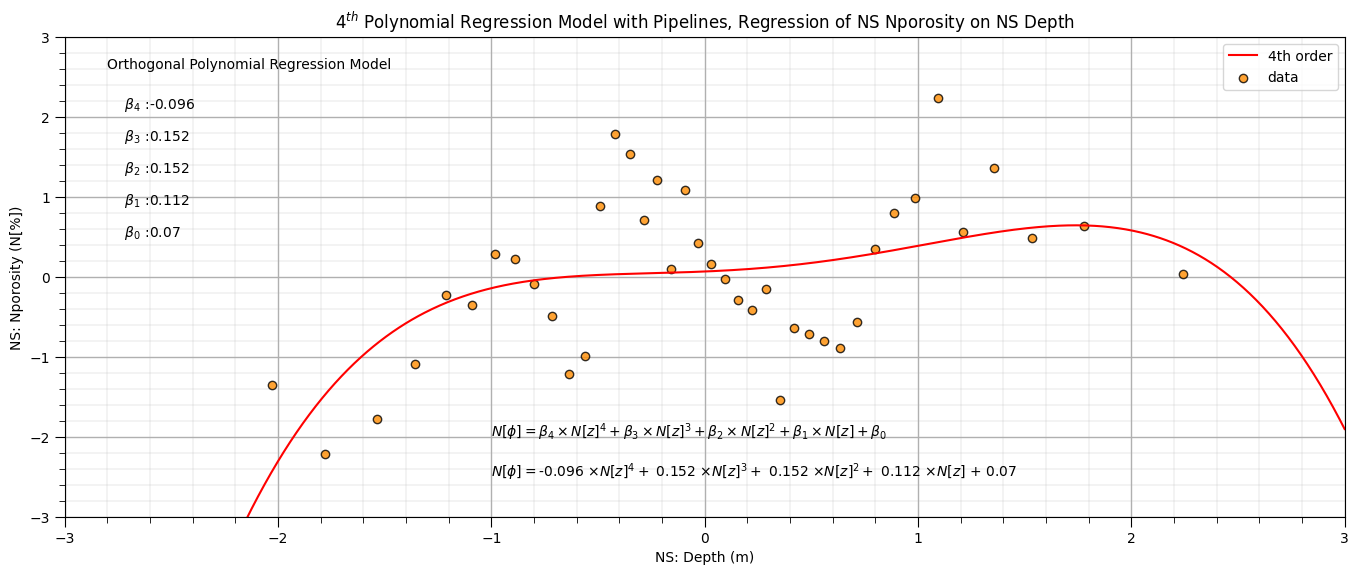

In [32]:
order=4                                                       # set the polynomial order

polyreg_pipe=make_pipeline(PolynomialFeatures(order),LinearRegression()) # make the modeling pipeline
polyreg_pipe.fit(X_ns.values.reshape(-1, 1), y_ns)            # fit the model to the data
y_hat = polyreg_pipe.predict(X_ns_values.reshape(-1, 1))      # predict with the modeling pipeline
poly_reg_model = polyreg_pipe.named_steps['linearregression'] # retrieve the model from the pipeline
pb0a,pb1,pb2,pb3,pb4 = np.round(poly_reg_model.coef_,3)       # retrieve the model parameters
pb0b = poly_reg_model.intercept_
pb0 = pb0a + pb0b

plt.subplot(111)                                              # plot the data and model
plt.plot(X_ns_values,y_hat, label='4th order',color = 'red') 
plt.scatter(X_ns,y_ns,marker='o',label='data',color = 'darkorange',alpha = 0.8,edgecolor = 'black')
plt.title(str(order) + r'$^{th}$ Polynomial Regression Model with Pipelines, Regression of NS ' + yname[0] + ' on NS ' + Xname[0])
plt.xlabel('NS: ' + Xname[0] + ' (' + Xunit[0] + ')')
plt.ylabel('NS: ' + yname[0] + ' (' + yunit[0] + ')')
plt.legend(); add_grid(); plt.xlim([-3.0,3.0]); plt.ylim([ymin,ymax])
plt.annotate('Orthogonal Polynomial Regression Model',[-2.8,2.6])
plt.annotate(r'    $\beta_4$ :' + str(round(pb4,3)),[-2.8,2.1])
plt.annotate(r'    $\beta_3$ :' + str(round(pb3,3)),[-2.8,1.7])
plt.annotate(r'    $\beta_2$ :' + str(round(pb2,3)),[-2.8,1.3])
plt.annotate(r'    $\beta_1$ :' + str(round(pb1,3)),[-2.8,0.9])
plt.annotate(r'    $\beta_0$ :' + str(round(pb0,2)),[-2.8,0.5])
plt.annotate(r'$N[\phi] = \beta_4 \times N[z]^4 + \beta_3 \times N[z]^3 + \beta_2 \times N[z]^2 + \beta_1 \times N[z] + \beta_0$',[-1.0,-2.0])
plt.annotate(r'$N[\phi] = $' + str(pb4) + r' $\times N[z]^4 +$ ' + str(pb3) + r' $\times N[z]^3 +$ ' + str(pb2) + r' $\times N[z]^2 +$ ' + 
             str(pb1) + r' $\times N[z]$ + ' + str(round(pb0,2)),[-1.0,-2.5])
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic treatment of polynomial regression. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)